<a href="https://colab.research.google.com/github/Noxscamp/CoderHouse/blob/main/Data_StoryTelling%2BMarin%2BColloca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # ***Video Game Sales*** 🎮

**Acerca del Dataset.**

*Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias. Fue generado por un raspado de vgchartz.com.*

**Los campos incluyen:**

*   Rank: Ranking de ventas totales.

*   Name: Nombre del juego.
*   Plataform: PLataforma del juego.

*   Year: Año en la cual el juego se lanzó.

*   Genre: Genero del juego.

*   Publisher: Editor del juego.
*   NA_Sales: Ventas en NA (Millones)


*   EU_Sales: Ventas en EU (Millones)


*   JP_Sales: Ventas en Japan (Millones)

*   Other_Sales: Otras ventas (Millones)
*   Global_Sales: Total de ventas.


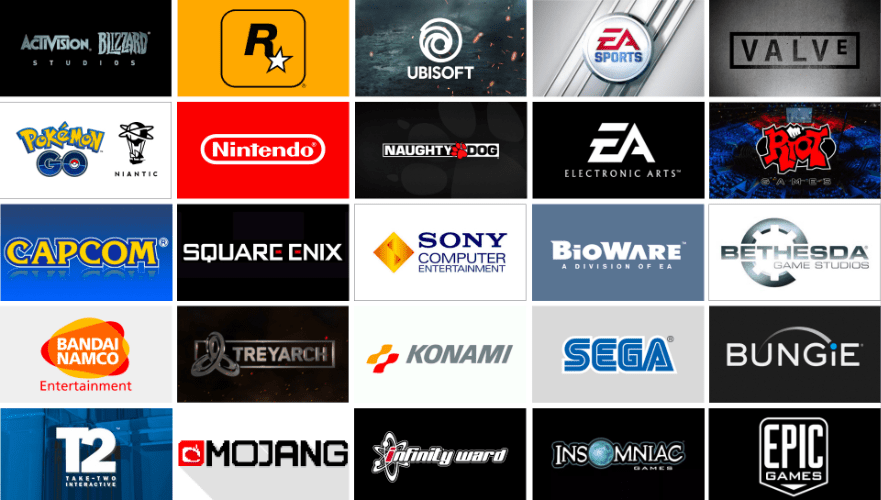


# Definición del objetivo
El objetivo en el proyecto a partir del dataset sera poder predecir futuras ventas teniendo en cuenta la referencia de la competitividad, no solo de la competencia de juegos que sean parecidos sino tambien del aquellos que pertenecen al mismo genero, analizando tambien el editor y la consola objetivo, para asi poder hacer un analisis de mercado correcto y tomar las desiciones mas convenientes para tener un optimo lanzamiento.
# Contexto comercial
El contexto general desde la perspectiva de la competitividad es muy basto por ende es necesario un analisis optimo para poder canalizar los recursos de manera objetiva para que el retorno sea rentable.
# Problema Comercial
El objetivo es contar con un modelo predictivo que ayude a tomar las desiciones correctas para asi el lanzamiento de futuros proyectos sean lo mas seguro posible para la empresa en cuestion.

# **Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data science- Datasets/House rent dataset/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.shape

(16598, 11)

Text(0.5, 1.0, 'Matris de valores perdidos')

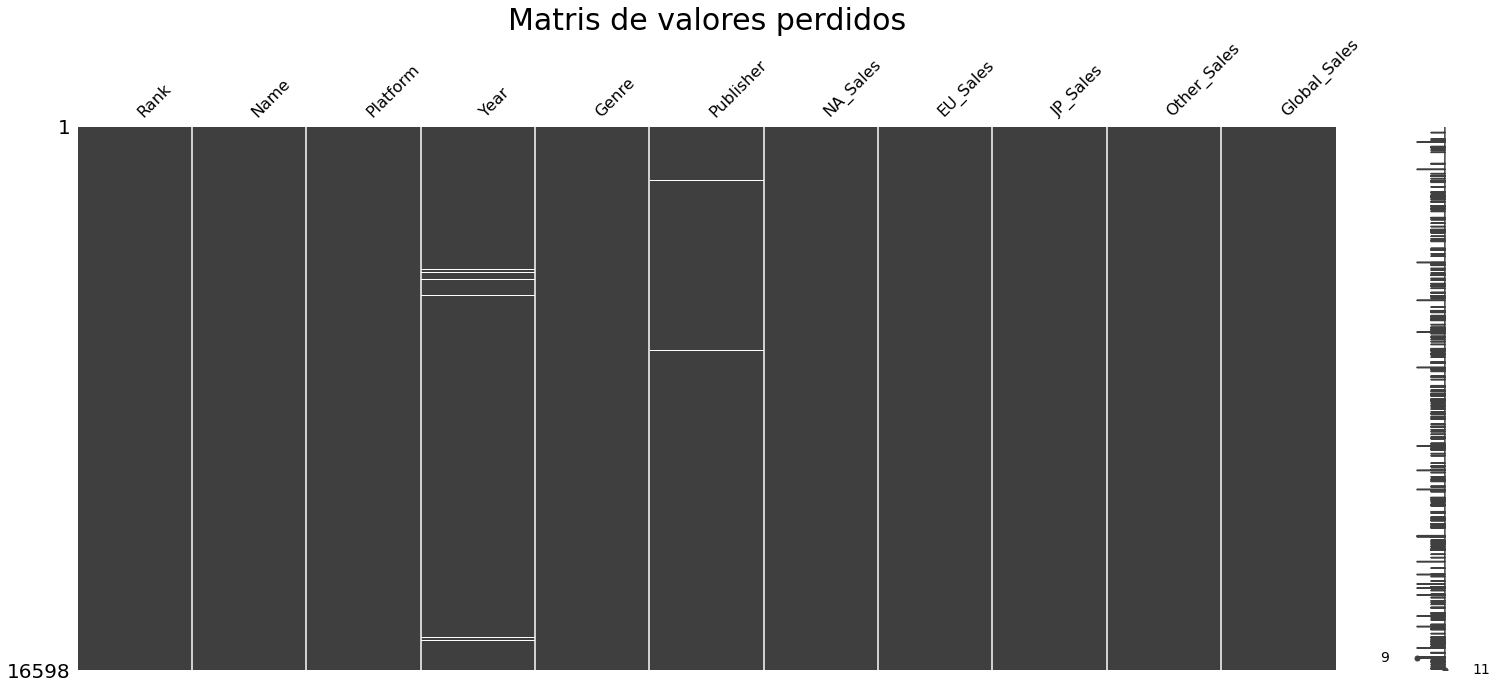

In [4]:
msno.matrix(df)
plt.title("Matris de valores perdidos",fontsize=30)

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

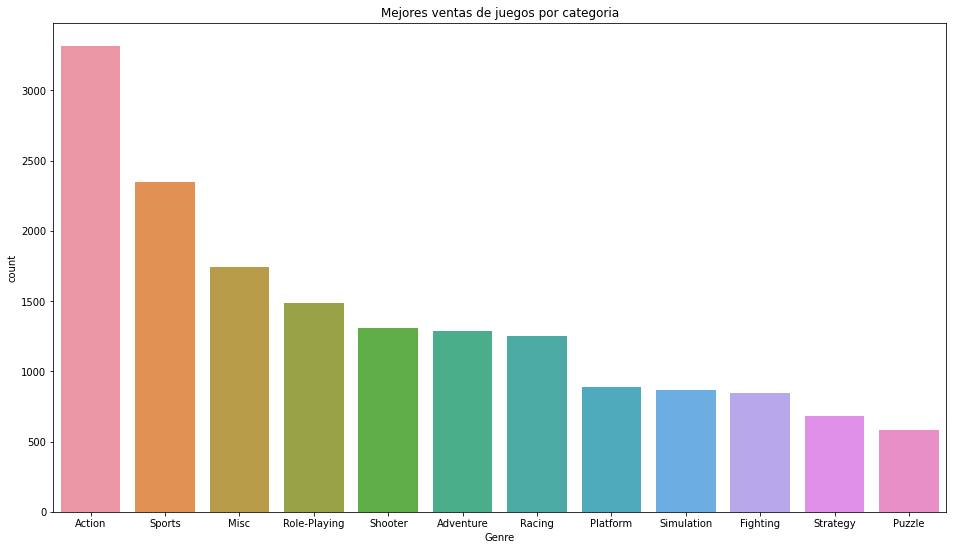

In [9]:
plt.figure(figsize=(16,9))
plt.title('Mejores ventas de juegos por categoria')
sns.countplot(data=df, x = 'Genre', order = df['Genre'].value_counts().index)

**Conclusion**

Visualizamos un DataSet prometedor, que tiene poca cantidad de nulos la cual opino sera conveniente eliminarlos, al ser poca cantidad no influye mucho, procederemos el mismo realizando la limpieza correspondiente en el sigueiente apartado.

# ***Dara Wrangling***

In [10]:
df= df.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
df.shape

(16291, 11)

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16291, dtype: bool

**Conclusion:**

Eliminamos los valores que tengan valores nulos y corroboramos que no contengan datos duplicados

# **Cuestiones**

Comenzaremos con cuestiones segun el enfoque la cual nos inclinamos segun lo aclarado al principio del proyecto, particularmente tomaremos preguntas yendo desde una perspectiva global a mas especifica.

*   Cuales son los juegos mas vendidos?
*   Cuales son los generos mas vendidos? 
*   Cuales son los juegos mas vendidos en NA,EU,JP,otros y global? 
*   Cuales son los Generos mas vendidos en NA,EU,JP,otros y global?
*   Que formato de consola venden mas juegos?
*   Que editora generaron mas ventas? 